In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load data
df = pd.read_csv('data/creditcard.csv')

In [3]:
# Scaling
scaler = RobustScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [4]:
# Split train and test
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['Class'])

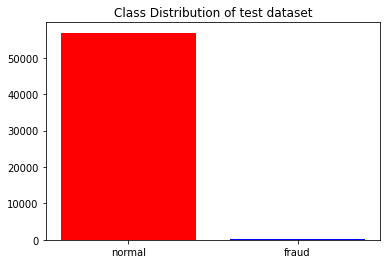

In [5]:
# Check test dataset class distribution
test_val_cnt = test['Class'].value_counts().reset_index()
plt.bar(test_val_cnt['index'], test_val_cnt['Class'], color=['red', 'blue'], tick_label=['normal', 'fraud'])
plt.title('Class Distribution of test dataset')
plt.show()

In [6]:
# Under Sampling train dataset
fraud = train[train['Class']==1].reset_index(drop=True)
normal = train[train['Class']==0]

num_of_normal = len(fraud) * 4    # 2:8 비율

normal = normal.sample(n=num_of_normal, random_state=42, ignore_index=True)

print(f'Length of fraud data: {len(fraud)}')
print(f'Length of normal data: {len(normal)}')

train = pd.concat([fraud, normal], ignore_index=True)

Length of fraud data: 394
Length of normal data: 1576


In [7]:
# # Delete outliers
# def del_outliers(df, col):
#     fraud = df[df['Class']==1][col].values
#     q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
#     iqr = q75 - q25
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off
#     df.drop(df[(df[col] > upper) | (df[col] < lower)].index, inplace=True)
#     print(f'Number of data after {col} ouliers removal: {len(df)}')
    
# columns = ['V10', 'V12', 'V14', 'V17']

# for col in columns:
#     del_outliers(train, col)

In [8]:
# Train Classifier
X_train = train.drop('Class', axis=1)
y_train = train['Class']
X_test = test.drop('Class', axis=1)
y_test = test['Class']

model = LogisticRegression(max_iter=10000)
params = {'penalty':['l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(model, params, scoring=['accuracy', 'roc_auc'], refit='roc_auc', return_train_score=True, cv=5)
grid.fit(X_train, y_train)

print('< Logistic Regression Results >')
print(f'Total fit time: {grid.cv_results_["mean_fit_time"].sum()}')
print(f'The best params: {grid.best_params_}')
print(f'Test accuracy: {round(grid.score(X_test, y_test) * 100, 2)}%')
print('\n')

model = KNeighborsClassifier()
params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(model, params, scoring=['accuracy', 'roc_auc'], refit='roc_auc', return_train_score=True, cv=5)
grid.fit(X_train, y_train)

print('< K-Neighbors Results >')
print(f'Total fit time: {grid.cv_results_["mean_fit_time"].sum()}')
print(f'The best params: {grid.best_params_}')
print(f'Test accuracy: {round(grid.score(X_test, y_test) * 100, 2)}%')
print('\n')

model = SVC()
params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(model, params, scoring=['accuracy', 'roc_auc'], refit='roc_auc', return_train_score=True, cv=5)
grid.fit(X_train, y_train)

print('< SVC Results >')
print(f'Total fit time: {grid.cv_results_["mean_fit_time"].sum()}')
print(f'The best params: {grid.best_params_}')
print(f'Test accuracy: {round(grid.score(X_test, y_test) * 100, 2)}%')
print('\n')

model = DecisionTreeClassifier()
params = {
    "criterion": ["gini", "entropy"], 
    "max_depth": list(range(2,10,1)), 
    "min_samples_leaf": list(range(2,10,1))
}
grid = GridSearchCV(model, params, scoring=['accuracy', 'roc_auc'], refit='roc_auc', return_train_score=True, cv=5)
grid.fit(X_train, y_train)

print('< Decision Tree Results >')
print(f'Total fit time: {grid.cv_results_["mean_fit_time"].sum()}')
print(f'The best params: {grid.best_params_}')
print(f'Test accuracy: {round(grid.score(X_test, y_test) * 100, 2)}%')
print('\n')

< Logistic Regression Results >
Total fit time: 0.1902923107147217
The best params: {'C': 0.01, 'penalty': 'l2'}
Test accuracy: 97.69%


< K-Neighbors Results >
Total fit time: 0.02692546844482422
The best params: {'algorithm': 'auto', 'n_neighbors': 4}
Test accuracy: 95.92%


< SVC Results >
Total fit time: 0.2857597827911377
The best params: {'C': 1, 'kernel': 'rbf'}
Test accuracy: 97.6%


< Decision Tree Results >
Total fit time: 2.0971799373626707
The best params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 8}
Test accuracy: 95.05%


